<a href="https://colab.research.google.com/github/pooyaphoenix/3man-chess/blob/master/HW2_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks: Hand Sign Detection


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We will start by loading the packages:

In [ ]:
import os
import string
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
from tensorflow.keras import regularizers

%matplotlib inline

Then, Unzip the data:

In [ ]:
with zipfile.ZipFile('drive/MyDrive/data.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

and Normalize the data before feeding to model:

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

After, we load the dataset:

In [ ]:
train_generator = train_datagen.flow_from_directory(
    './data/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'training'
    )

validation_generator = train_datagen.flow_from_directory(
    './data/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'validation'
    )

test_generator = test_datagen.flow_from_directory(
    './data/Test',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale'
    )

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


The input data are from different 24 classes excluding J and Z:

In [ ]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
print(classes, end = " ")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

Now, take a look at some examples of images in the dataset. Feel free to change the value of array range and re-run to see different examples.

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

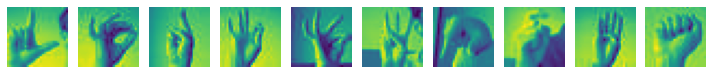

[10.  5. 16.  5.  5. 21. 15. 22.  1.  0.]


In [ ]:
sample_training_images, sample_training_labels = next(train_generator)
plotImages(sample_training_images[:10])
print(sample_training_labels[:10])

From now implement your model.
<br>
Please add cells and explain yours developing steps and your results.

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای توضیحات از زبان فارسی استفاده نمایید.
<br>
موفق باشید

</div>

<div dir='rtl'style="text-align: right;font-family:verdana;">
با توجه به اینکه تصاویر ما دارای ابعاد 28 در 28 هستند پس در لایه ورودی input_shape=(28, 28) خواهیم داشت 
<br>
و همینطور در لایه مخفی یا همان  hidden layer از تابع قالیت relu استفاده میکنیم تا این تابع فعالیت به ازای ورودی های مثبت واکنش نشان میدهد و مقادیر منفی را همواره صفر در نظر میگیرد
<br>
در لایه آخر هم چون ما 24 عدد کلاس داریم که شامل حروفات انگلیسی به غیر از j و z میشود پس نتیجه عملکرد شبکه را بین این 24 کلاس  جستجو خواهیم کرد و هر کدام که مقدار بیشتری داشته باشد کلاس مورد پیش بینی ما خواهد بود.
</div>

In [ ]:
img_height=28
img_width=28
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(24)
])

<div dir='rtl'style="text-align: right;font-family:verdana;">

در کد قسمت بالا ترتیب لایه های کدمان را ساختیم حال در  قسمت  
الگوریتم بهینه سازی خو را وارد میکنیم که میتواند شامل الگوریتم های بهینه سازی مثل:
<br>
Adam, Nadam , SGD  باشد
<br>
معیار سنجش عملکرد شبکه هم میتواند مقادیری متفاوتی مثل 
accuracy, recall, f1_score, precision داشته باشد 

<br>


In [ ]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 24)                3096      
Total params: 103,576
Trainable params: 103,576
Non-trainable params: 0
_________________________________________________________________


<div dir='rtl'style="text-align: right;font-family:verdana;">
در کد شکل پایین مدل ساخته شده در قسمت های بالا را روی داده های آموزشی و داده ها اعتبار سنجی خود اجرا میکنیم 

<br>
مشاهده میکنیم که  epochs دارای مقدار 25 میباشد و بعد از مقدار 25 مدل پیشرفت زیادی ندارد پس به همین مقدار بسنده میکنیم 
<br>
در اجرای هر یک از epoch ها میزان زمان طی شده به ازای هر epoch  و همینطور loss و accuracy برای داده ی train , validation را مشاهده میکنیم .
<br>
برای مثال برای epoch 10 داریم:

 6s 33ms/step - loss: 0.5644 - accuracy: 0.8523 - val_loss: 0.5612 - val_accuracy: 0.8473

</div>



In [ ]:
epochs = 25
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
)

Epoch 1/25
172/172 [==============================] - 7s 36ms/step - loss: 2.9237 - accuracy: 0.1636 - val_loss: 2.0982 - val_accuracy: 0.4129
Epoch 2/25
172/172 [==============================] - 6s 34ms/step - loss: 1.9266 - accuracy: 0.4668 - val_loss: 1.5789 - val_accuracy: 0.5718
Epoch 3/25
172/172 [==============================] - 6s 34ms/step - loss: 1.5115 - accuracy: 0.5856 - val_loss: 1.3231 - val_accuracy: 0.6238
Epoch 4/25
172/172 [==============================] - 6s 34ms/step - loss: 1.2598 - accuracy: 0.6440 - val_loss: 1.1499 - val_accuracy: 0.6793
Epoch 5/25
172/172 [==============================] - 6s 34ms/step - loss: 1.1079 - accuracy: 0.6897 - val_loss: 1.0111 - val_accuracy: 0.7188
Epoch 6/25
172/172 [==============================] - 6s 34ms/step - loss: 0.9788 - accuracy: 0.7298 - val_loss: 0.9366 - val_accuracy: 0.7349
Epoch 7/25
172/172 [==============================] - 6s 34ms/step - loss: 0.8868 - accuracy: 0.7510 - val_loss: 0.8268 - val_accuracy: 0.7758

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)
print(type(test_acc))

57/57 - 1s - loss: 0.9848 - accuracy: 0.7287

Test accuracy: 0.7286670207977295
<class 'float'>


<div dir='rtl'style="text-align: right;font-family:verdana;">

بعد از اجرای مدل روی داده های تست به دقت بالای 70 درصد دست پیدا میکنیم
<br>
در قسمت پایین سعی میکنیم نمودار validation  و train  را رسم میکنیم بعد از رسم مشاهده میکنیم که در هر دو نمودار loss و  accuracy  داده های validation معمولا به خط train نزدیک هستن این در حالیست که در داده های overfit یا underfit شده این دو خط واگرایی نسبت به هم دارند 

</div>




dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


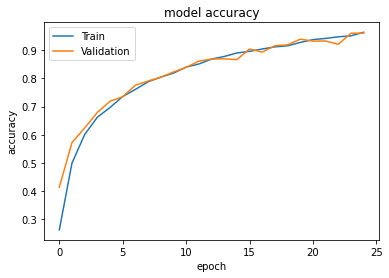

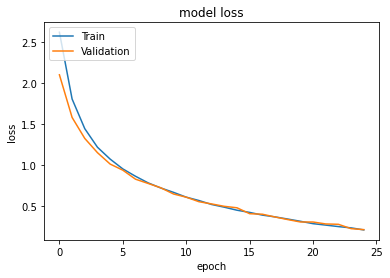

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای حل اختلاف accuracy بین داده های آموزشی و  آزمون در شبکه خود تغییراتی اعمال میکنیم 
<br>
تغییرات شامل اضافه کردن متد dropout بین لایه های مخفی به میزان 0.3 میباشد  و همینطور اضافه کردن regularization l2 به اندازه 0.0005 

اضافه کردن این دو تکنیک باعث  کاهش اختلاف در دقت داده های آموزشی و آزمون میشود 

البته یک لایه مخفی با 128 نود نیز اضافه کردیم که منجر به افزایش دقت بشود.
</div>

In [ ]:
img_height=28
img_width=28
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, 
                          kernel_regularizer=regularizers.l2(0.0001),
                          activation='relu'),
    tf.keras.layers.Dense(128, 
                      kernel_regularizer=regularizers.l2(0.0001),
                      activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(24)
])

model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                3096      
Total params: 120,088
Trainable params: 120,088
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 20
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
)

Epoch 1/20
172/172 [==============================] - 7s 36ms/step - loss: 2.9024 - accuracy: 0.1537 - val_loss: 1.7806 - val_accuracy: 0.4682
Epoch 2/20
172/172 [==============================] - 6s 35ms/step - loss: 1.7111 - accuracy: 0.4652 - val_loss: 1.2801 - val_accuracy: 0.6267
Epoch 3/20
172/172 [==============================] - 6s 35ms/step - loss: 1.2972 - accuracy: 0.5909 - val_loss: 1.0633 - val_accuracy: 0.6853
Epoch 4/20
172/172 [==============================] - 6s 35ms/step - loss: 1.0659 - accuracy: 0.6652 - val_loss: 0.8460 - val_accuracy: 0.7561
Epoch 5/20
172/172 [==============================] - 6s 35ms/step - loss: 0.8932 - accuracy: 0.7228 - val_loss: 0.7271 - val_accuracy: 0.7942
Epoch 6/20
172/172 [==============================] - 6s 35ms/step - loss: 0.7466 - accuracy: 0.7694 - val_loss: 0.5877 - val_accuracy: 0.8425
Epoch 7/20
172/172 [==============================] - 6s 35ms/step - loss: 0.6427 - accuracy: 0.8049 - val_loss: 0.4939 - val_accuracy: 0.8692

<div dir='rtl'style="text-align: right;font-family:verdana;">
در شکل پایین
مشاهده میکنیم که نسبت به دقت پیش بینی روی داده های test در شبکه اول هم رشد داشته ایم و هم اختلاف با داده های train کاهش یافته است.
</div>

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)
print(type(test_acc))

57/57 - 1s - loss: 0.9435 - accuracy: 0.7744

Test accuracy: 0.7744004726409912
<class 'float'>


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


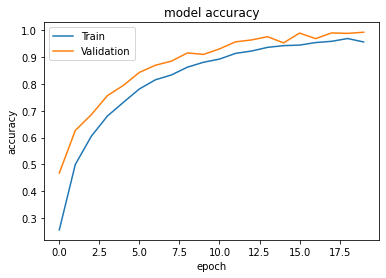

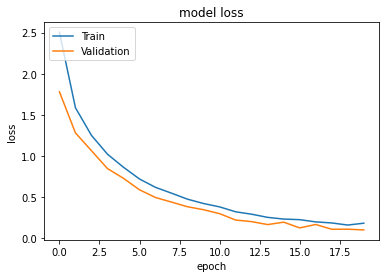

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_generator)
predictions[1]


array([1.4121011e-10, 8.8531389e-14, 4.3299902e-02, 2.0212742e-08,
       3.2617681e-10, 1.4446162e-01, 1.4319258e-03, 9.8795944e-08,
       7.1320955e-13, 1.9768600e-11, 2.8137342e-07, 1.7700588e-12,
       6.3803176e-09, 8.1074935e-01, 3.5886415e-11, 4.8801265e-08,
       2.1610542e-15, 3.7359857e-06, 1.8686620e-06, 1.1975343e-14,
       3.1441569e-09, 2.3770310e-09, 5.1101288e-05, 7.3586123e-11],
      dtype=float32)



<div dir='rtl'style="text-align: right;font-family:verdana;">
پاسخ به سوالات مطرح شده در پروژه:

پاسخ سوال اول 

جهت حل مشکل overfit از dropout  و regularization l2 استفاده کردیم 

پاسخ سوال دوم

ابر پارامتر هایی مانند learning rate در قسمت الگوریتم بهینه سازی چون از کتابخانه tenserflow استفاده میکنیم بصور پیش فرض روی learning_rate=0.001 میباشد 

در مورد تعداد لایه های مخفی و میزان نود در هر لایه از روش تجربی و تا حدودی آزمون و خطا استفاده کردیم .

در مورد epochs از میزان 20 استفاده کردیم چون بعد از عدد 20 شبکه پیشرفت آنچنانی نداشت و صرفا هدر رفت زمان داشتیم 


پاسخ سوال سوم 

در مقایسه الگوریتم های بهینه سازی بین adams  و SGD که همان gradien descent میباشد باید گفت که عملکرد بهینه ساز adams خیلی بهتر از SGD روی این داده آموزشی بود و به صورت کلی کمترین loss  و بیشترین Accuracy را الگوریتم Adams نسبت به دیگران الگوریتم ها دارا بود 

</div>



In [ ]:

import tensorflow as tf

#Prepare to feed input, i.e. feed_dict and placeholders
w1 = tf.placeholder("float", name="w1")
w2 = tf.placeholder("float", name="w2")
b1= tf.Variable(2.0,name="bias")
feed_dict ={w1:4,w2:8}

#Define a test operation that we will restore
w3 = tf.add(w1,w2)
w4 = tf.multiply(w3,b1,name="op_to_restore")
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Create a saver object which will save all the variables
saver = tf.train.Saver()

#Run the operation by feeding input
print (sess.run(w4,feed_dict))
#Prints 24 which is sum of (w1+w2)*b1 

#Now, save the graph
saver.save(sess, 'my_test_model',global_step=1000)

AttributeError: ignored